# Python Assignment - EEOB 546 spring 2024 - Kiara Kappelmann

## IMPORTANT: install BioPython so that this will work

In [29]:
import Bio
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd
from Bio.Seq import Seq

import pandas as pd
import numpy as np

## 1 ##
## Dr. X: this gets sequences 
## Please properly document this function in the Jupyter notebook 
## Your descriptions of all functions should contain information about what the function does,
## as well as information about the return types and arguments.

### Input = a fasta file
### Return = a dictionary for sequence data. Species_name is a key and the values are the sequences
### General description = use this file to find DNA sequences from a fasta file for species

In [40]:
def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)

## 2 ##
####### YOUR STRING-TRANSLATE FUNCTION ########
## Write a function that translates sequences
## All sequences start at codon position 1
## Complete a function that translates using a loop over the string of nucleotides
## Here is  some pseudo-code and suggestions
## feel free to change the function and variable names

In [21]:
def translate_sequences(nucl_seq):
    #mito_table.forward_table[codon] converts the condon into amino acids
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] 
    aa_seq_string="" #aa_seq_string being initiated
    for nucl in range(0,int(len(nucl_seq)/3)):
        codon=nucl_seq[3*nucl:3*nucl+3]
        
        #if codon is stop codon,the aa_seq_string before the stop codon will be returned
        if codon in ["TAG","TAA","AGG","AGA"]:
            return aa_seq_string
        aa_seq_string=aa_seq_string+mito_table.forward_table[codon]
    return(aa_seq_string)

## 3 ##
####### YOUR ALTERNATIVE FUNCTION ########
## Is there a better way to write the translation function? (Hint: yes there is.) 
## Perhaps using available BioPython library utilities?
## Please also write this function.

In [22]:
def alternative_translation(dna_seq):
    sequence = Seq(str(dna_seq), generic_dna)
    aa_seq = sequence.translate(table = 2, to_stop = True)
    aa_seq_string = str(aa_seq)
    return(aa_seq_string)

In [35]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

## 4 ##
####### YOUR COUNT AA ANALYSIS FUNCTION ########
## Write a function that calculates the molecular weight of each amino acid sequence.
## For this, you can use some BioPython functions. I think you can use the ProtParam module.
## For more info, check this out: http://biopython.org/wiki/ProtParam
## So you should import the following before defining your function:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
# def compute_molecular_weight(aa_seq):
#     # I think the ProtParam functions may require aa_seq to be a string.
#     # It may not work if the amino acid sequence has stop codons.
#     run the ProteinAnalysis() function on aa_seq
#	  return the molecular weight

In [36]:
def compute_molecular_weight(aa_seq):
    analysed_seq = ProteinAnalysis(aa_seq)
    mw = analysed_seq.molecular_weight()
    return mw

## 5 ##
####### YOUR GC CONTENT ANALYSIS FUNCTION ########
## Write a function that calculates the GC-content (proportion of "G" and "C") of each DNA sequence and returns this value.

In [37]:
def gc_content(dna_seq):
    count = dna_seq.count("G") + dna_seq.count("C")
    gc = 100 * count / len(dna_seq)
    return(gc)

#%%%%%%%%%%%%%%#
###   MAIN   ###
#%%%%%%%%%%%%%%#

In [38]:
penguins_df = pd.read_csv("penguins_mass.csv")
species_list = list(penguins_df.species) #Create a list of species names.

In [41]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") 

## 6 ## 
## Add two new columns to the penguin DataFrame: (1) molecular weight and (2) GC content.
## Set the value to 'NaN' to indicate that these cells are currently empty.

In [42]:
penguins_df['molecular_weight']='NaN' 
penguins_df['GC_content'] = 'NaN'

## 7 ##
## Write a for-loop that translates each sequence and also gets molecular weight and computes the GC content
## of each translated sequence and adds those data to DataFrame
# for key, value in cytb_seqs.items():
#     aa_seq = nuc2aa_translate_function(value) # whichever function you prefer of #2 or #3
#     get the molecular weight of aa_seq
#     get the GC content of the DNA sequence
#     fill in empty cells in DF that you created above

In [44]:
for key, value in cytb_seqs.items():
    aa_seq = translate_sequences(str(value)) #translate the nucleotide sequence to an amino acid sequence
    mw = compute_molecular_weight(aa_seq) #calculate molecular weight of amino acid sequence
    gcContent = gc_content(value) #calculate GC content of nucleotide squence
    penguins_df.loc[penguins_df.species == key,'molecular_weight'] = mw #update molecular_weight value of current species
    penguins_df.loc[penguins_df.species == key,'GC_content'] = gcContent #update GC_content value of current species
    
print (penguins_df)

                    species   mass molecular_weight GC_content
0      Aptenodytes forsteri  28.00       42459.6021  48.381452
1   Aptenodytes patagonicus  13.40       42563.7067  49.693788
2       Eudyptes chrysocome   2.80       42475.5753  51.181102
3     Eudyptes chrysolophus   4.50       42445.5493  50.918635
4         Eudyptes sclateri   4.25       42475.5753  50.831146
5           Eudyptula minor   1.60       42491.6408  49.256343
6        Pygoscelis adeliae   4.60        42458.614  49.081365
7     Pygoscelis antarctica   4.10       42404.5423  47.769029
8          Pygoscelis papua   6.10       42595.8759  47.156605
9       Spheniscus demersus   3.20        42431.549  48.293963
10     Spheniscus humboldti   4.75        42399.552  49.256343
11  Spheniscus magellanicus   3.40       42459.6021  48.206474


## 8 ##
## Plot a bar-chart of the mass with the x-axes labeled with species names.
## *Q1* What is the smallest penguin species? 
## *Q2* What is the geographical range of this species?

<Axes: xlabel='species'>

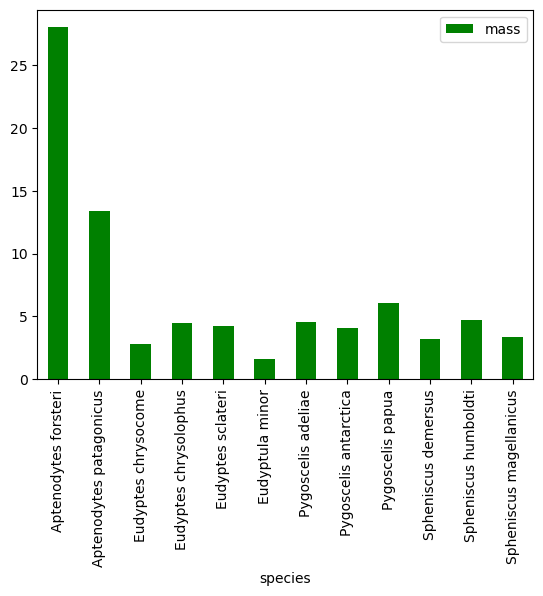

In [50]:
penguins_df.plot(x = "species", y = "mass", kind = "bar", color = "green")

#### Q1: Eudyptula minor
#### Q2: https://en.wikipedia.org/wiki/Little_penguin#/media/File:Map-of-distribution-of-Eudyptula-penguins-Blue-and-red-colours-indicate.png

## 9 ##
## Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).

<Axes: xlabel='GC_content', ylabel='molecular_weight'>

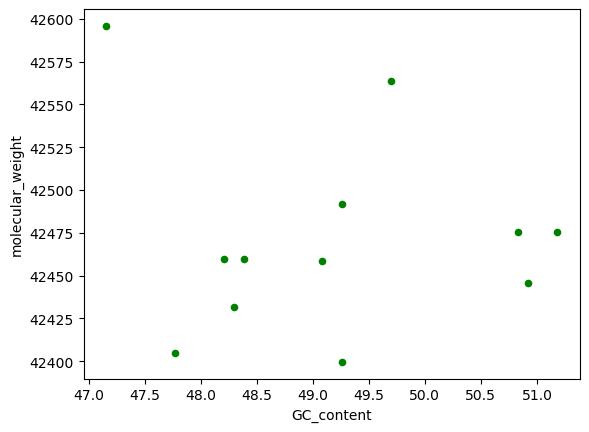

In [64]:
penguins_df.plot(y= "molecular_weight", x = "GC_content", kind = "scatter", color = "green")

## 10 ##
## Save the new DataFrame to a file called "penguins_mass_cytb.csv"

In [57]:
penguins_df.to_csv("penguins_mass_cytb.csv")

## 11 - BONUS ##
## What else can we do with this dataset in Python? 
## Add functions or anything that might be interesting and fun. (optional)

<Axes: xlabel='species'>

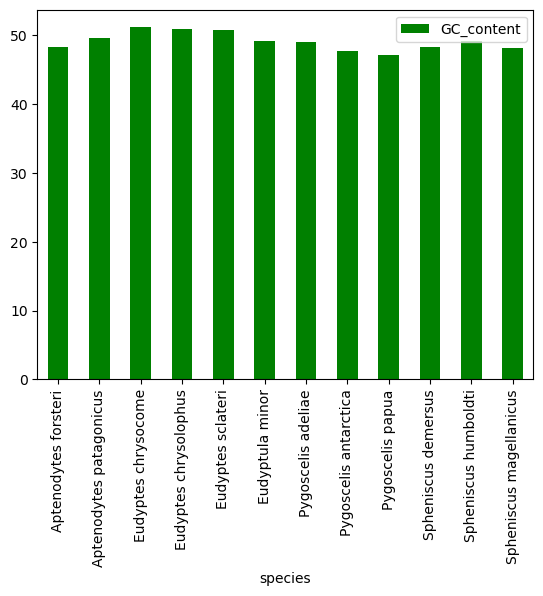

In [59]:
penguins_df.plot(x = "species", y = "GC_content", kind = "bar", color = "green")

<Axes: xlabel='molecular_weight', ylabel='mass'>

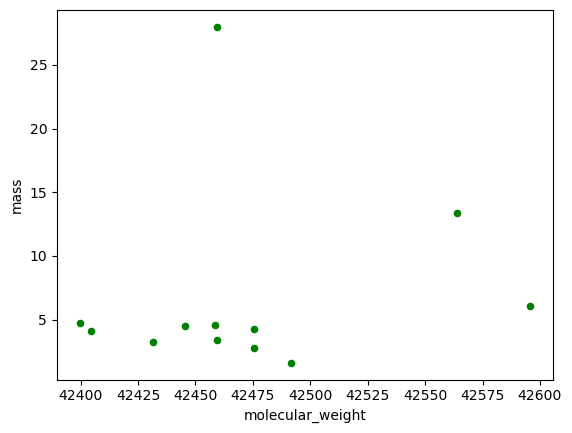

In [62]:
penguins_df.plot(x= "molecular_weight", y = "mass", kind = "scatter", color = "green")